In [14]:
#Importing relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Importing the data
EV = pd.read_csv(r'C:\\Users\\Brian Motee\\Desktop\\dataset\\Electric_Vehicle.csv')
#Inspecting the first 5 rows of the dataset
EV.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [16]:
#Inpecting the data structure
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173533 non-null  object 
 1   County                                             173528 non-null  object 
 2   City                                               173528 non-null  object 
 3   State                                              173533 non-null  object 
 4   Postal Code                                        173528 non-null  float64
 5   Model Year                                         173533 non-null  int64  
 6   Make                                               173533 non-null  object 
 7   Model                                              173533 non-null  object 
 8   Electric Vehicle Type                              173533 non-null  object

In [17]:
#Renaming Variables
EV.rename(columns={'VIN (1-10)':'Vin','Postal Code':'Postal_Code','Model Year':'Model_Year','Electric Vehicle Type':'Electric_Vehicle_Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility':'Clean_Alternative_Fuel_Vehicle_Eligibility','Electric Range':'Electric_Range','Base MSRP':'Base_MSRP','Legislative District':'Legislative_District','DOL Vehicle ID':'DOL_Vehicle_ID','Vehicle Location':'Vehicle_Location','Electric Utility':'Electric_Utility','2020 Census Tract':'2020_Census_Tract'}, inplace=True)


In [18]:
#Inspecting if changes reflect
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Vin                                         173533 non-null  object 
 1   County                                      173528 non-null  object 
 2   City                                        173528 non-null  object 
 3   State                                       173533 non-null  object 
 4   Postal_Code                                 173528 non-null  float64
 5   Model_Year                                  173533 non-null  int64  
 6   Make                                        173533 non-null  object 
 7   Model                                       173533 non-null  object 
 8   Electric_Vehicle_Type                       173533 non-null  object 
 9   Clean_Alternative_Fuel_Vehicle_Eligibility  173533 non-null  object 
 

In [19]:
#Changing Data types
EV = EV.astype({'Vin':'string','County':'string','City':'string','State':'string','Make':'string','Model':'string','Electric_Vehicle_Type':'string','Electric_Utility':'string'})
#Inspecting the new data types
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Vin                                         173533 non-null  string 
 1   County                                      173528 non-null  string 
 2   City                                        173528 non-null  string 
 3   State                                       173533 non-null  string 
 4   Postal_Code                                 173528 non-null  float64
 5   Model_Year                                  173533 non-null  int64  
 6   Make                                        173533 non-null  string 
 7   Model                                       173533 non-null  string 
 8   Electric_Vehicle_Type                       173533 non-null  string 
 9   Clean_Alternative_Fuel_Vehicle_Eligibility  173533 non-null  object 
 

In [20]:
#Inspecting the electric range variable
EV.Electric_Range.unique()

array([ 14., 215.,  38.,  32.,  23., 239., 220., 153.,  19., 107.,  33.,
       291., 249.,  73.,  72., 238.,   0.,  21., 208.,  84.,  26., 259.,
       150.,  75., 210.,  25.,  82., 151., 270., 204.,  30., 293., 125.,
        35.,  87., 200.,  22., 308., 266., 234.,  47.,  83.,  81.,  97.,
        13., 149.,  53.,  37., 322.,  10., 330.,  58.,  18., 203.,   6.,
       289., 100.,  42.,  16.,  17.,  76.,  62.,  20., 126.,  93.,  29.,
        15., 233.,  39., 258.,  28., 111.,  27.,   8., 170., 192., 218.,
       110.,  68.,  24.,  34., 222.,  41.,  12., 124., 114., 265.,  11.,
       337.,  40.,  48.,  31., 103., 245.,  74.,  59.,   9.,  56.,  57.,
        36.,  95.,  51.,  nan])

Electric_Range is the distance a vehicle can travel purely on electric charge. It is evident that the variable has zeros(0) and missing data.This is my main variable, I want it to be complete hence I will drop the zeros.

In [22]:
#Filtering out rows in the Electric_Range variable with values equal to 0
EV = EV[EV['Electric_Range']!=0]
#inspecting missing values per variable
EV.isna().sum()


Vin                                             0
County                                          5
City                                            5
State                                           0
Postal_Code                                     5
Model_Year                                      0
Make                                            0
Model                                           0
Electric_Vehicle_Type                           0
Clean_Alternative_Fuel_Vehicle_Eligibility      0
Electric_Range                                  1
Base_MSRP                                       1
Legislative_District                          226
DOL_Vehicle_ID                                  0
Vehicle_Location                                9
Electric_Utility                                5
2020_Census_Tract                               5
dtype: int64

# UNIVARIATE STATISTICS

In [23]:
#Display measures of central tendancy for Electric_Range
print('The average electric range is ' + str(EV.Electric_Range.mean()))
print('The median electric range is ' + str(EV.Electric_Range.median()))
print('The mode electric range is ' + str(EV.Electric_Range.mode()))

The average electric range is 122.4639563533967
The median electric range is 84.0
The mode electric range is 0    215.0
Name: Electric_Range, dtype: float64


The difference between the mean and the median is too big, suggesting the variable Electric_Range has outliers and possibly skewed.I will visualize the data to confirm my suspicion.

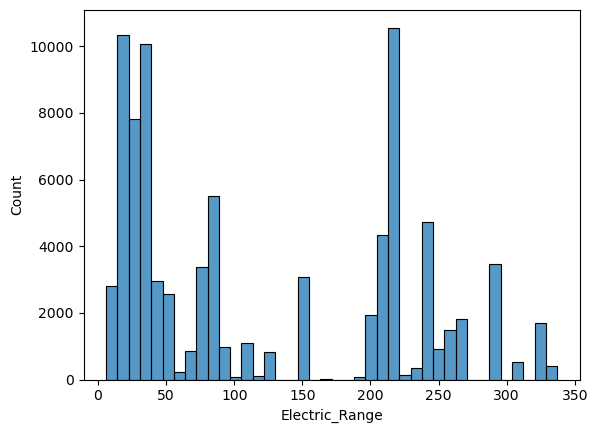

<Figure size 640x480 with 0 Axes>

In [24]:
#Checking the distribution of Electric_Range using a histogram
sns.histplot(x='Electric_Range',data=EV)
plt.show()
plt.clf()

That means I cannot rely on the mean When I am analyzing the data as the mean is affected by the presence of outliers. Therefore to evaluate the spread of data, I will use interquartile range instead of standard deviation

In [25]:
#Describing the variability of Electric_Range
EV.Electric_Range.quantile(0.75)-EV.Electric_Range.quantile(0.25)

183.0

An interquartile range of 183.0 means that the middle 50% of the data values in the dataset span a range of 183.0 units. This suggests that the spread of the data values within this middle 50% is relatively large.

# #  Categorical variable 

In [26]:
#Getting the top 10 Electric Vehicles manufacturers
EV.Make.value_counts(normalize=True).head(10)

Make
TESLA        0.300431
NISSAN       0.127395
CHEVROLET    0.109573
TOYOTA       0.068074
BMW          0.065481
JEEP         0.050956
FORD         0.045946
KIA          0.044737
CHRYSLER     0.034706
VOLVO        0.031291
Name: proportion, dtype: Float64

30% of the electric vehicles in this dataset are from manufactured by Tesla, followed by Nissan 13% and Chevrolet 11%.

In [27]:
#Proportion of Electric vehicles by electric vehicle type
EV.Electric_Vehicle_Type.value_counts(normalize=True)

Electric_Vehicle_Type
Battery Electric Vehicle (BEV)            0.555138
Plug-in Hybrid Electric Vehicle (PHEV)    0.444862
Name: proportion, dtype: Float64

More than half the Electric Vehicles(56%) are Battery Electric Vehicle(BEV).

# BIVARIATE STATISTICS.
Electric_Range describes how far a vehicle can travel purely on electric charge. I will examine the association between  top two manufacturers and evaluate Electric Range, and also the association between Electric_Vehicle_Type and Electric_Range

In [30]:
#Getting data for Tesla and Nissan
Tesla_EV = EV.Electric_Range[EV.Make=='TESLA']
Nissan_EV = EV.Electric_Range[EV.Make=='NISSAN']
Chevrolet_EV = EV.Electric_Range[EV.Make=='CHEVROLET']
Toyota_EV = EV.Electric_Range[EV.Make=='TOYOTA']
BMW_EV = EV.Electric_Range[EV.Make=='BMW']
Jeep_EV = EV.Electric_Range[EV.Make=='JEEP']
Ford_EV = EV.Electric_Range[EV.Make=='FORD']
Kia_EV = EV.Electric_Range[EV.Make=='KIA']
Chrysler_EV = EV.Electric_Range[EV.Make=='CHRYSLER']
Volvo_EV = EV.Electric_Range[EV.Make=='VOLVO']
#Getting the means for Tesla and Nissan
Mean_Tesla = np.mean(Tesla_EV)
Mean_Nissan = np.mean(Nissan_EV)
mean_Chevrolet = np.mean(Chevrolet_EV)
mean_Toyota = np.mean(Toyota_EV)
mean_BMW = np.mean(BMW_EV)
mean_Jeep = np.mean(Jeep_EV)
mean_Ford = np.mean(Ford_EV)
mean_Kia = np.mean(Kia_EV)
mean_chrysler = np.mean(Chrysler_EV)
mean_Volvo = np.mean(Volvo_EV)
#Printing the means
print("This is Tesla's average Electric Range: " + str(Mean_Tesla))
print("This is Nissan's average Electric Range: " + str(Mean_Nissan))
print("This is Chevrolet's average Electric Range: " + str(mean_Chevrolet))
print("This is Toyota's average Electric Range: " + str(mean_Toyota))
print("This is BMW's average Electric Range: " + str(mean_BMW))
print("This is Jeep's average Electric Range: " + str(mean_Jeep))
print("This is Ford's average Electric Range: " + str(mean_Ford))
print("This is Kia's average Electric Range: " + str(mean_Kia))
print("This is Chrysler's average Electric Range: " + str(mean_chrysler))
print("This is Volvo's average Electric Range: " + str(mean_Volvo))


This is Tesla's average Electric Range: 240.81777708349605
This is Nissan's average Electric Range: 104.23586295818751
This is Chevrolet's average Electric Range: 136.74590427240605
This is Toyota's average Electric Range: 29.017580144777664
This is BMW's average Electric Range: 46.92886579466045
This is Jeep's average Electric Range: 22.380612479852637
This is Ford's average Electric Range: 25.31996935648621
This is Kia's average Electric Range: 87.08943089430895
This is Chrysler's average Electric Range: 32.21399594320487
This is Volvo's average Electric Range: 24.388076490438696


# ## Interpretation
The huge difference in the means suggest there is an association between electric ranges and the manufacturers as it varies depending on the manufacturer. for instance Tesla has more than twice electric range of Nissan

In [33]:
#Evaluating the association between Electric vehicle type and electric range
BEV = EV.Electric_Range[EV.Electric_Vehicle_Type =='Battery Electric Vehicle (BEV)']
PHEV = EV.Electric_Range[EV.Electric_Vehicle_Type =='Plug-in Hybrid Electric Vehicle (PHEV)']
#Getting the means
BEV_Mean = np.mean(BEV)
PHEV_Mean = np.mean(PHEV)
#Printing the means
print("The average BEV Electric range is " + str(BEV_Mean))
print("The average PHEV Electric range is " + str(PHEV_Mean))

The average BEV Electric range is 195.93080418471942
The average PHEV Electric range is 30.78298826322036


The BEV electric vehicle travels more than 6 times further than the PHEV electric vehicle

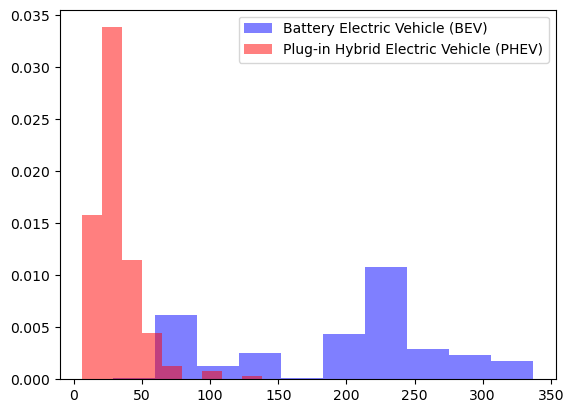

In [35]:
#Illustrating the associations with an overlapping histogram
plt.hist(BEV, color='blue',label='Battery Electric Vehicle (BEV)',density=True,alpha=0.5)
plt.hist(PHEV, color='red',label='Plug-in Hybrid Electric Vehicle (PHEV)',density=True,alpha=0.5)
plt.legend()
plt.show()

The overlapping histogram suggests that there is a strong association between the electric vehicle type and Electric Range